In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
my_file = "/content/drive/My Drive/Colab Notebooks/Pre-trained data/"
train_df = pd.read_csv(my_file + 'train.csv').fillna(' ')

# Define some hyperparameters for performing tokenization
max_features = 20000
max_text_length = 100

x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen = max_text_length)

embedding_dim = 100
embeddings_index = dict()

f = open(my_file + '/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features -1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

Found 400000 word vectors.


Implement

In [ ]:
import nltk
from os import listdir
from os.path import isfile, join
from tensorflow import keras
import nltk
from nltk.stem import WordNetLemmatizer


my_file = "/content/drive/My Drive/Colab Notebooks/Pre-trained data/"
model = keras.models.load_model(my_file + 'my_model2')
my_file1 = "/content/drive/My Drive/Colab Notebooks/all_files/"
onlyfiles = [f for f in listdir(my_file1) if isfile(join(my_file1, f))]
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.DataFrame()
for x in onlyfiles:
  df = df.append(pd.read_csv(my_file1+ x,sep=';')[['textDisplay','textOriginal']])
df.head()

new_df = pd.DataFrame(pd.concat([df['textDisplay'],df['textOriginal']]))
new_df = new_df.dropna()
print(len(new_df))
new_df.head()

import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

new_df['after_filter'] = new_df[0].astype(str).apply(deEmojify)

def alnum_space(text):
  return re.sub(r'[^A-Za-z ]+', '', text)

new_df['after_filter'] = new_df['after_filter'].astype(str).apply(alnum_space)

import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def process_english_w(x):
  return " ".join(w for w in nltk.wordpunct_tokenize(x) \
          if str(w).lower() in words or not w.isalpha())

new_df['after_filter'] = new_df['after_filter'].astype(str).apply( process_english_w)
new_df['after_filter'] = new_df['after_filter'].astype(str).apply(lambda x: lemmatizer.lemmatize(x))

x_test_tokenized = x_tokenizer.texts_to_sequences(new_df['after_filter'].values)

x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

y_testing = model.predict(x_testing, verbose=1, batch_size=128)
new_df['Toxic'] = ['not toxic' if x < .5 else 'toxic' for x in y_testing]
new_df[['after_filter', 'Toxic']].head(100)

15777


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


124/124 [==============================] - 8s 60ms/step


after_filter      Toxic
0                                                       not toxic
1                         what do your have to do with  not toxic
2    doesnt have a good rational reason to invade s...  not toxic
3                             Victory for great Russia  not toxic
4    a shill so its no use with totally convinced R...  not toxic
..                                                 ...        ...
97   they need the natural even further to the west...  not toxic
98   Empire must spread or die So russia will die n...      toxic
99                        the mortar team was away you  not toxic
100              Pat M like arent theyre just Like you      toxic
101  The been cranked up to since Russia in a full ...  not toxic

[100 rows x 2 columns]

In [ ]:
import plotly.express as px

fig = px.bar(new_df.groupby('Toxic')['after_filter'].count().reset_index(), x='Toxic', y='after_filter',title='Toxic comments and non toxic comments')
fig.show()

1_file.csv
23/23 [==============================] - 1s 29ms/step


not toxic    1243
toxic         177
Name: Toxic, dtype: int64

12.46% Toxic comments and 87.54% non toxic comments


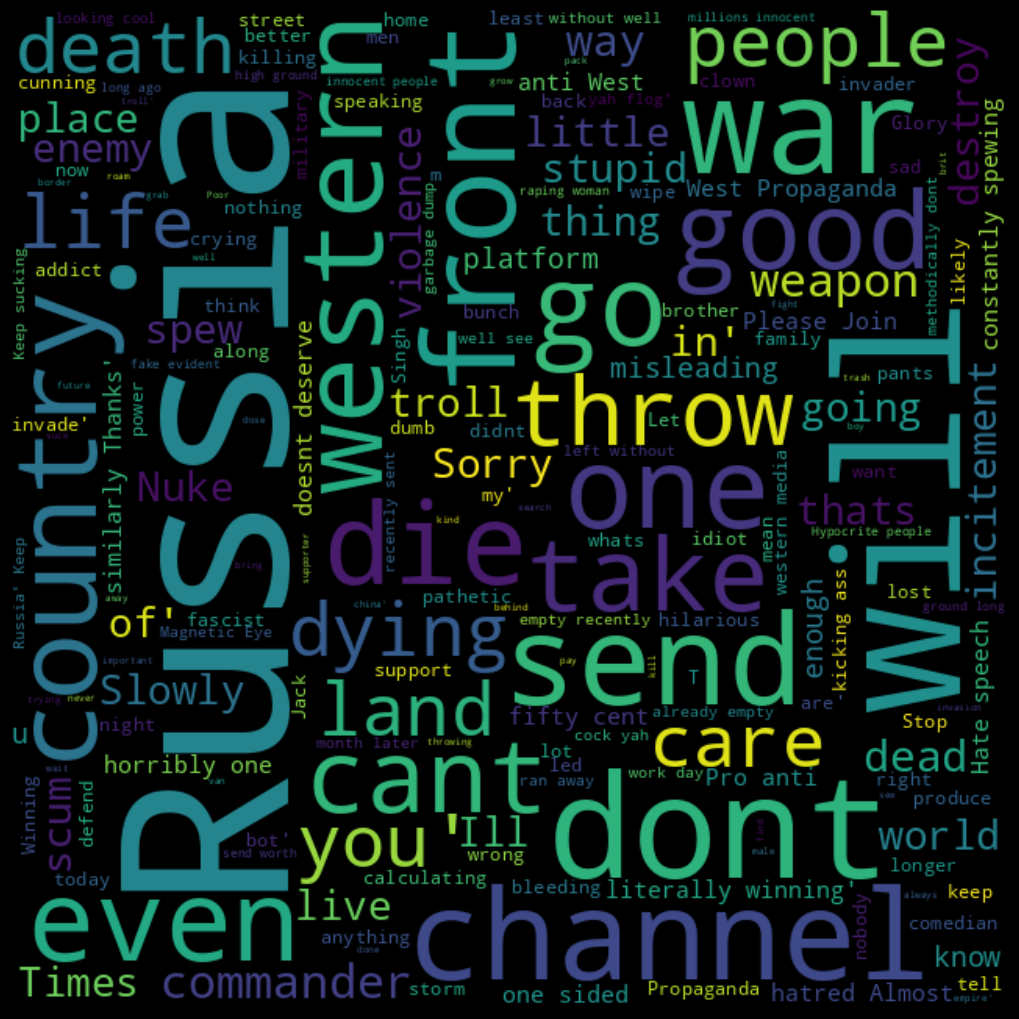

2_file.csv
130/130 [==============================] - 5s 38ms/step


not toxic    6982
toxic        1320
Name: Toxic, dtype: int64

15.9% Toxic comments and 84.1% non toxic comments


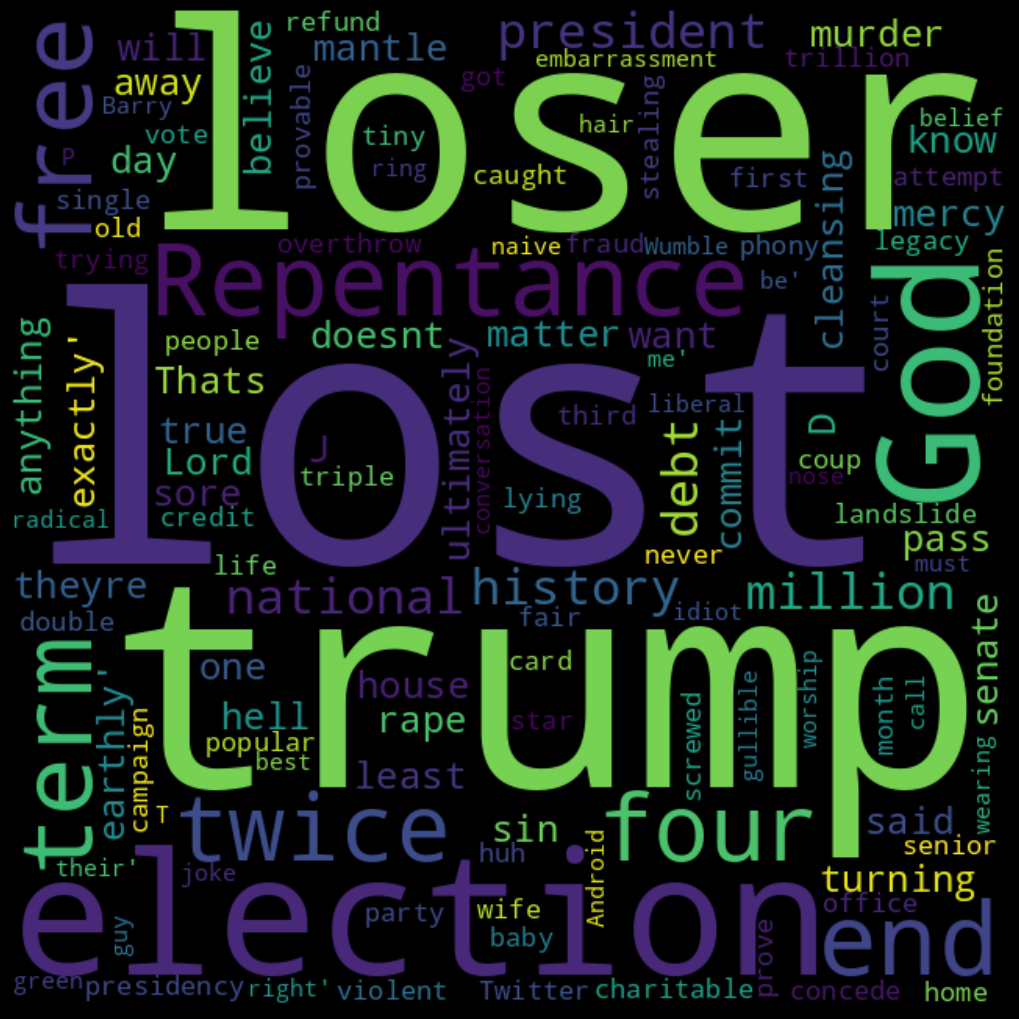

3_file.csv
21/21 [==============================] - 1s 30ms/step


not toxic    1118
toxic         202
Name: Toxic, dtype: int64

15.3% Toxic comments and 84.7% non toxic comments


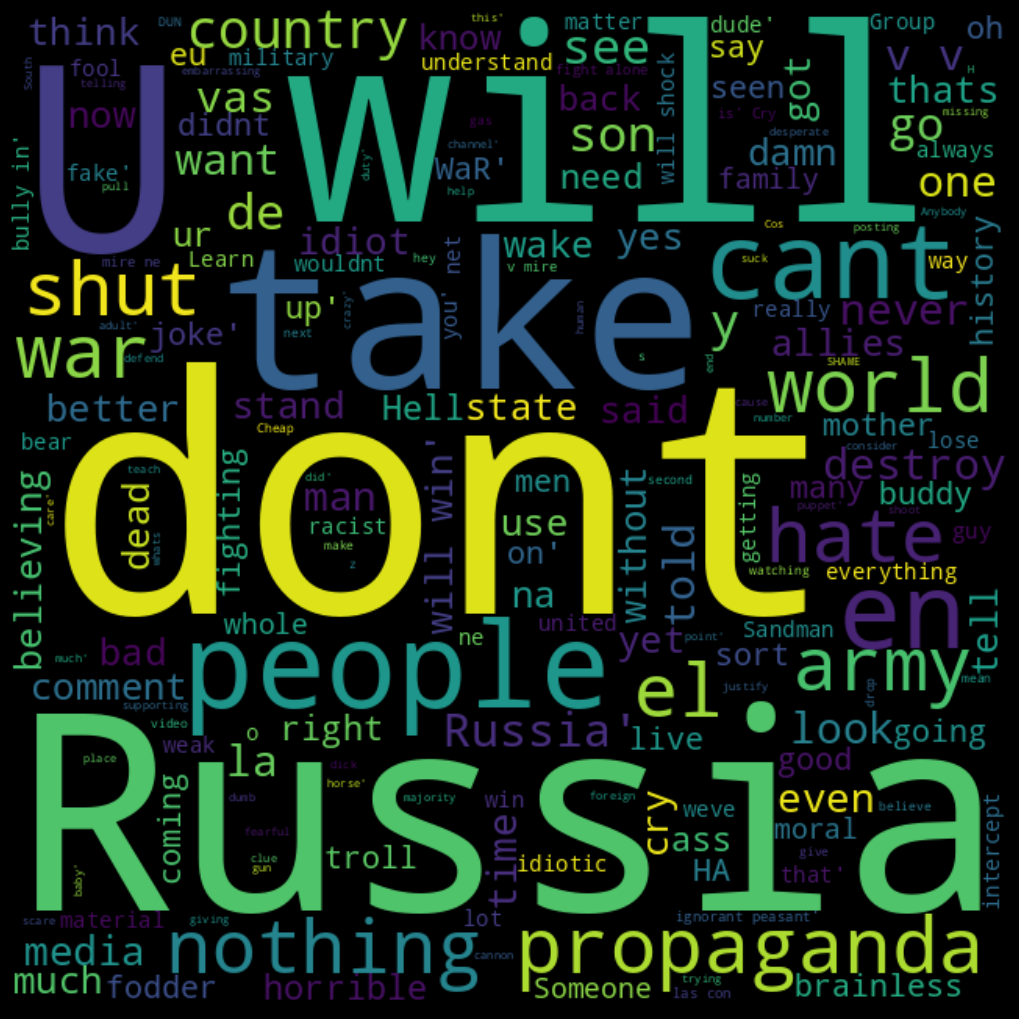

4_file.csv
2/2 [==============================] - 0s 54ms/step


not toxic    102
toxic         10
Name: Toxic, dtype: int64

8.93% Toxic comments and 91.07% non toxic comments


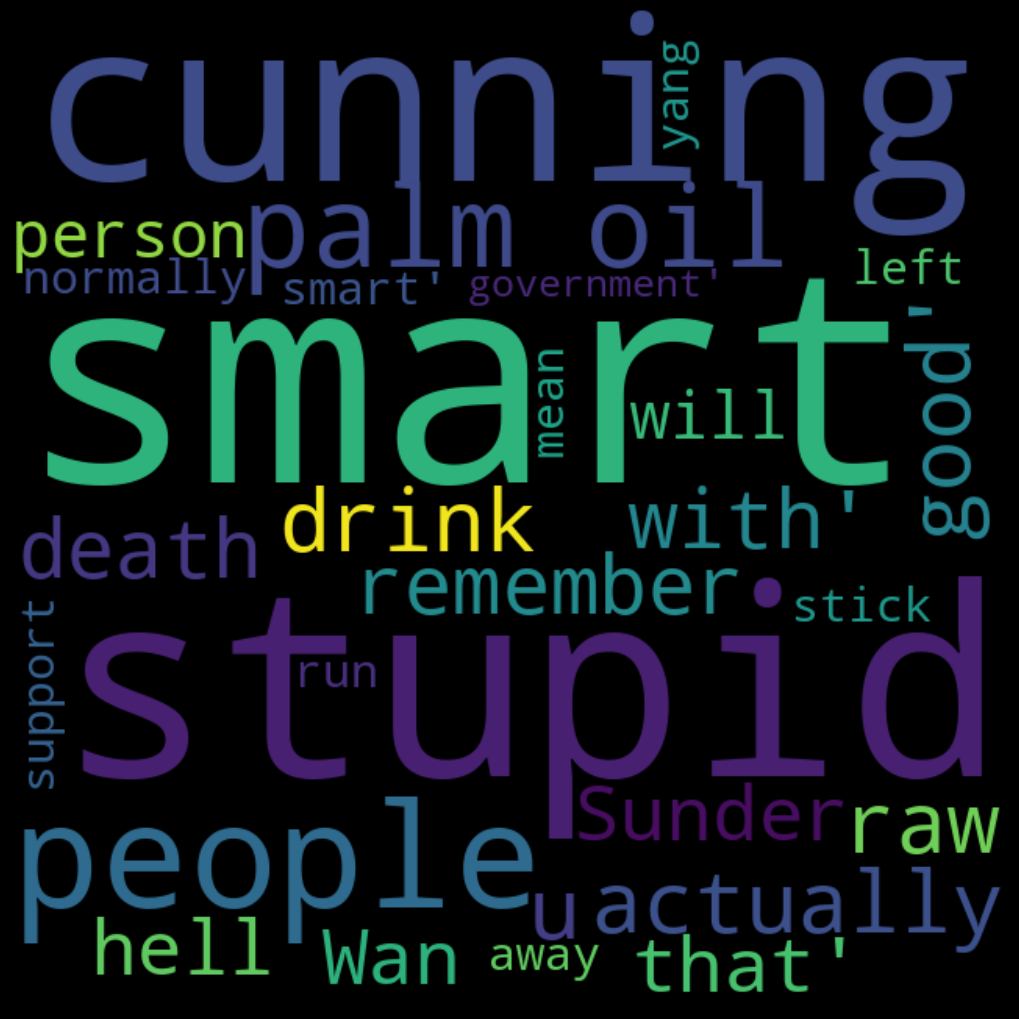

5_file.csv
7/7 [==============================] - 0s 31ms/step


not toxic    340
toxic         50
Name: Toxic, dtype: int64

12.82% Toxic comments and 87.18% non toxic comments


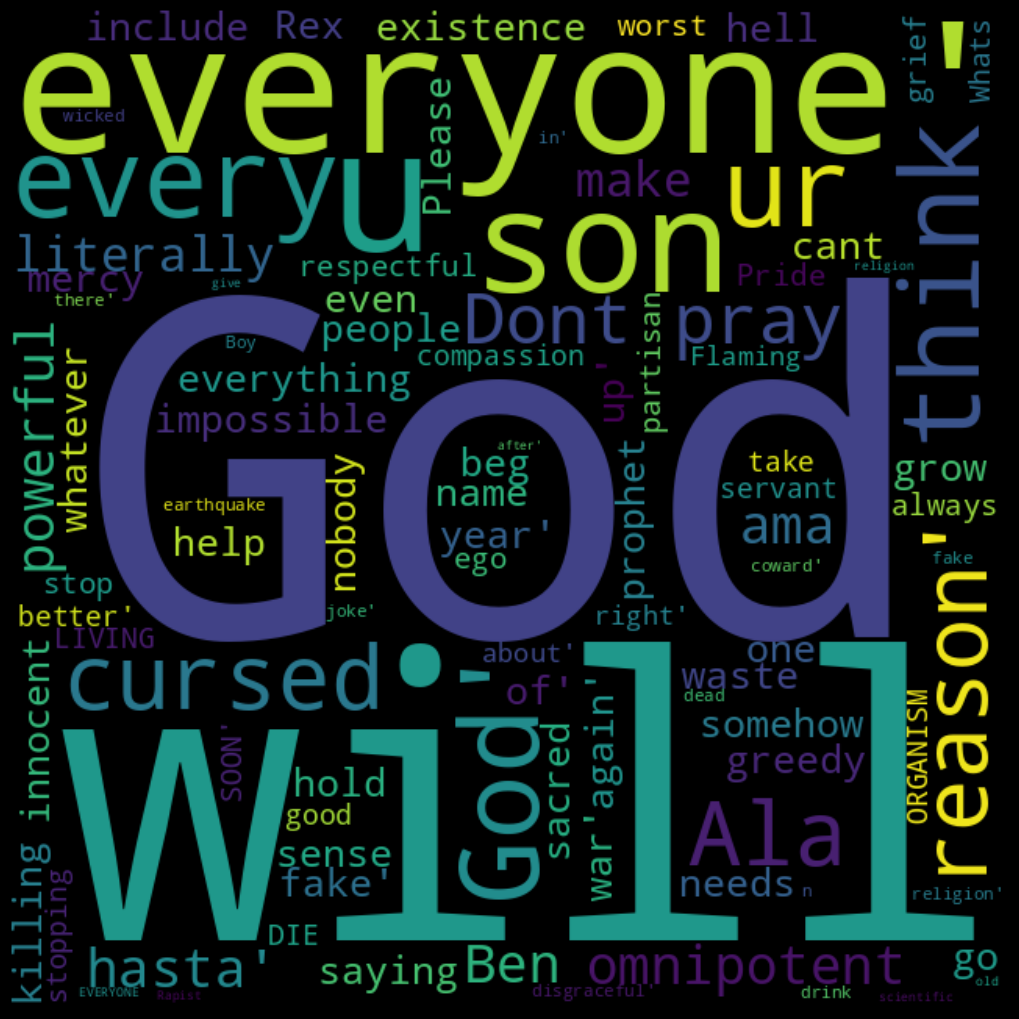

6_file.csv
29/29 [==============================] - 1s 39ms/step


not toxic    1522
toxic         298
Name: Toxic, dtype: int64

16.37% Toxic comments and 83.63% non toxic comments


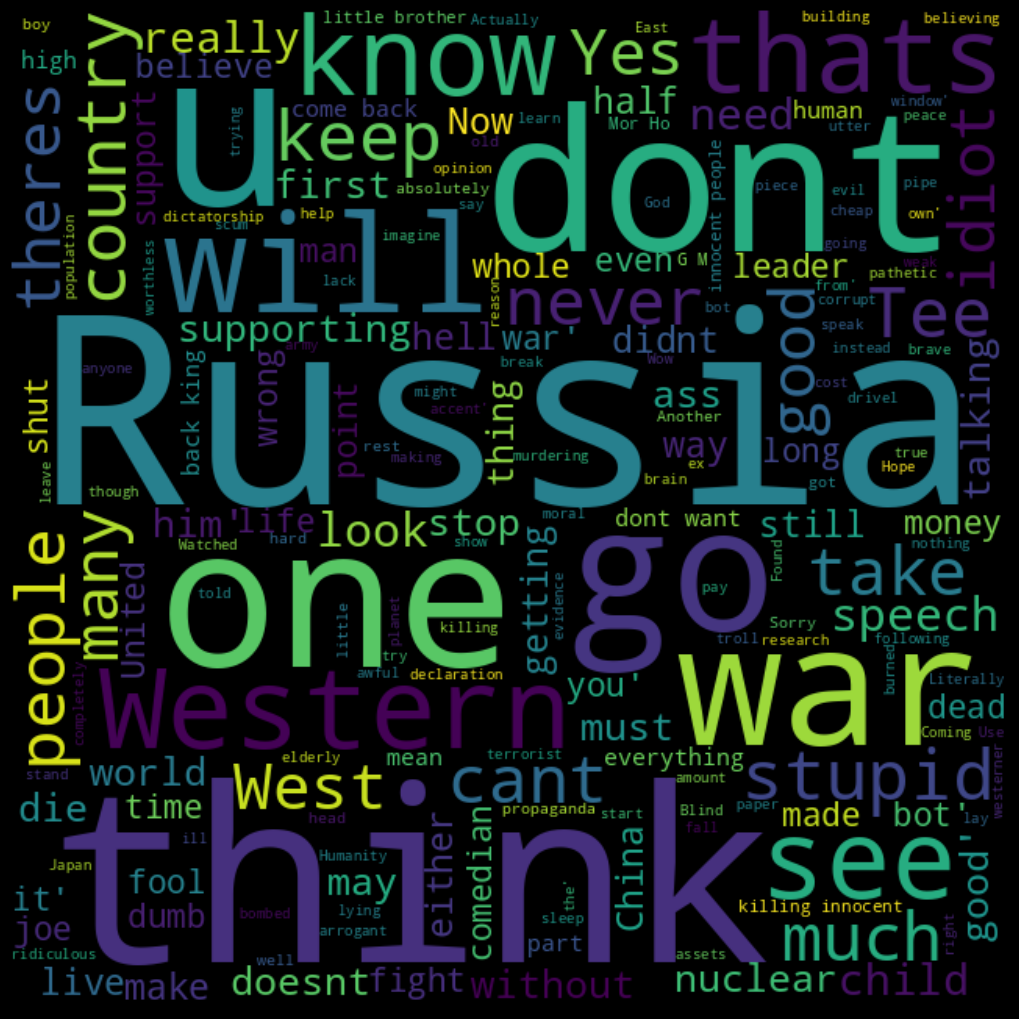

7_file.csv
23/23 [==============================] - 1s 38ms/step


not toxic    1290
toxic         164
Name: Toxic, dtype: int64

11.28% Toxic comments and 88.72% non toxic comments


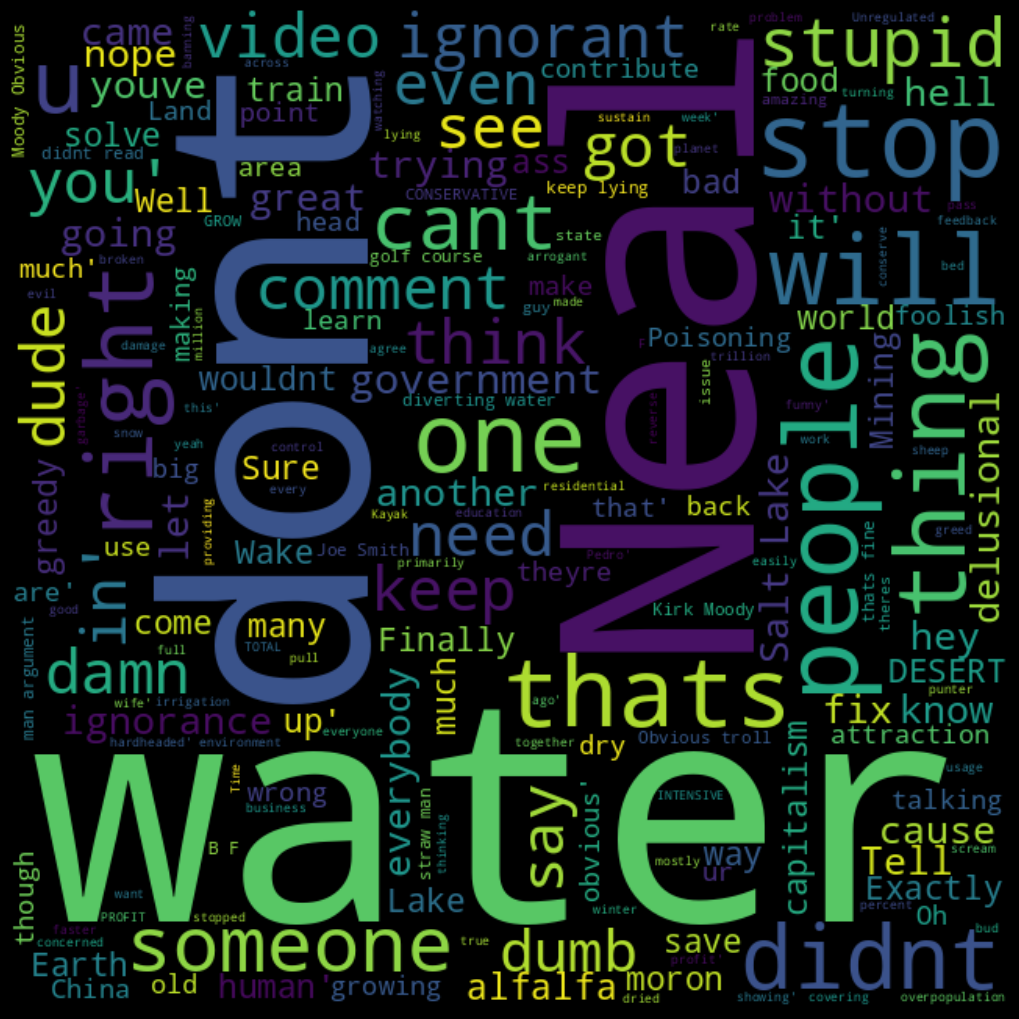

8_file.csv
38/38 [==============================] - 1s 39ms/step


not toxic    2134
toxic         254
Name: Toxic, dtype: int64

10.64% Toxic comments and 89.36% non toxic comments


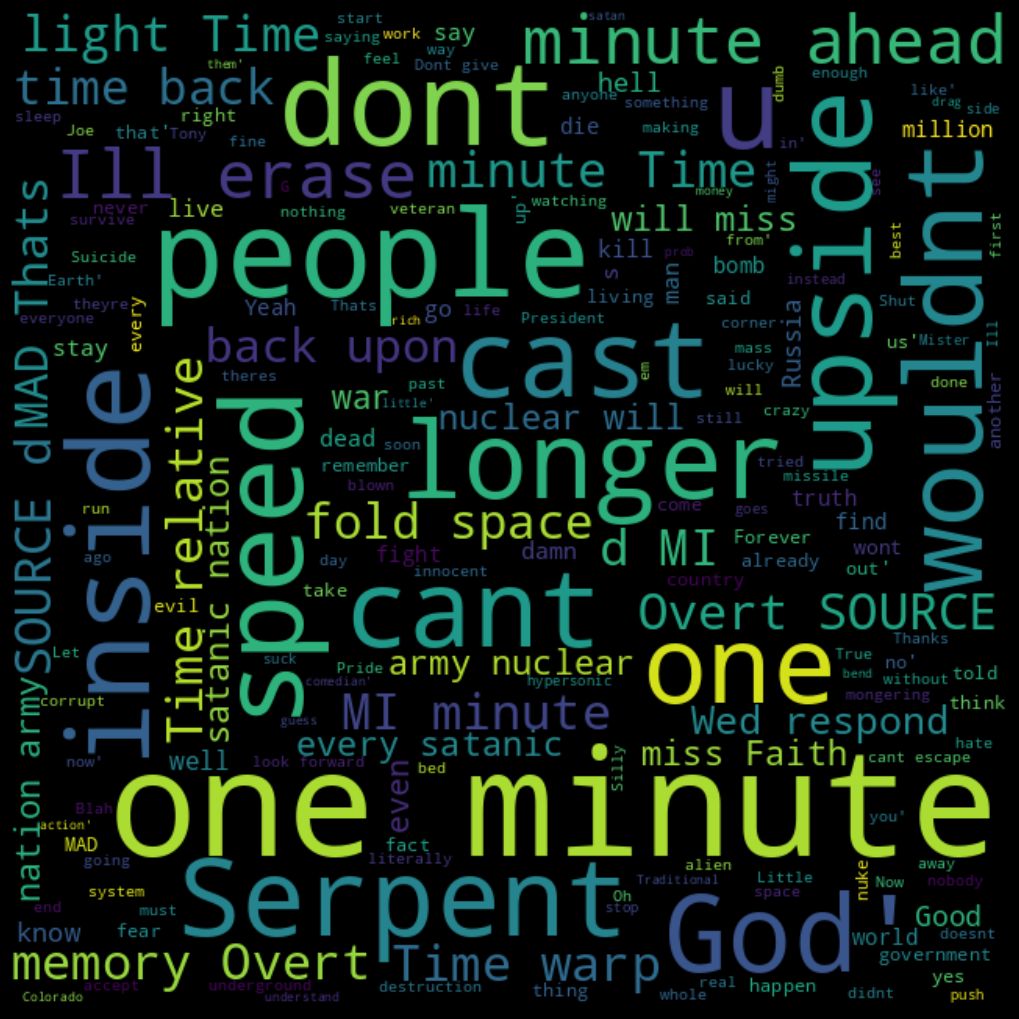

9_file.csv
53/53 [==============================] - 2s 39ms/step


not toxic    3091
toxic         253
Name: Toxic, dtype: int64

7.57% Toxic comments and 92.43% non toxic comments


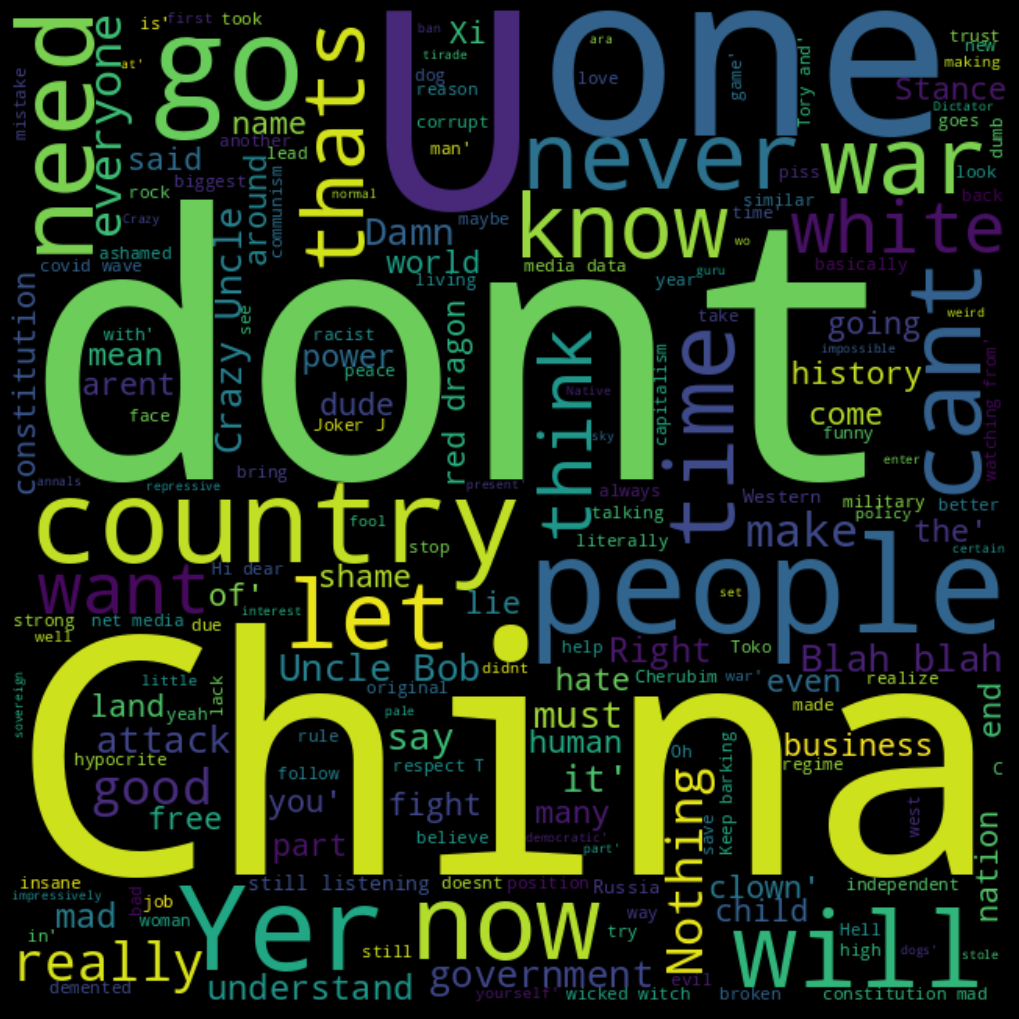

10_file.csv
53/53 [==============================] - 2s 42ms/step


not toxic    2928
toxic         417
Name: Toxic, dtype: int64

12.47% Toxic comments and 87.53% non toxic comments


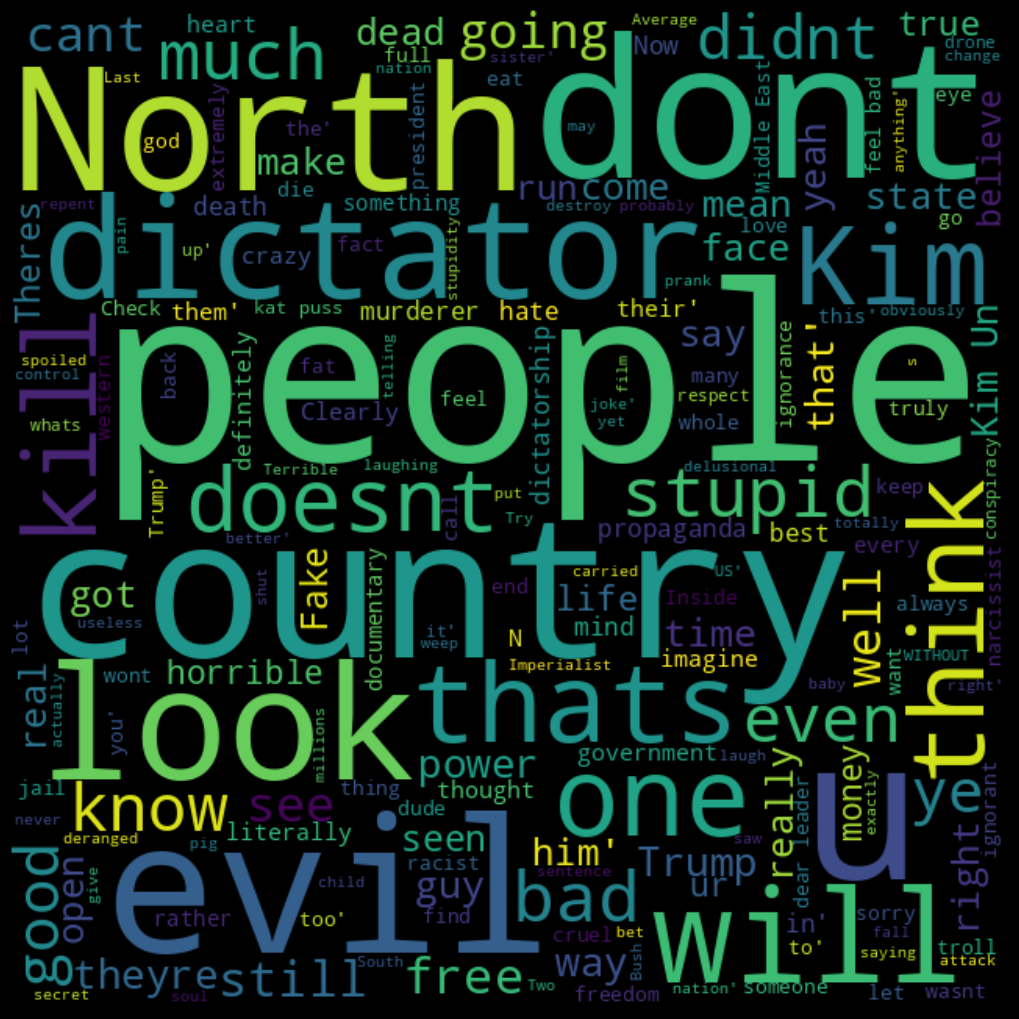

In [ ]:
for x in onlyfiles:
  print(x)
  df = pd.read_csv(my_file1+ x,sep=';')[['textDisplay','textOriginal']]
  new_df = pd.DataFrame(pd.concat([df['textDisplay'],df['textOriginal']]))
  new_df = new_df.dropna()
  new_df['after_filter'] = new_df[0].astype(str).apply(deEmojify)

  new_df['after_filter'] = new_df['after_filter'].astype(str).apply(alnum_space)
  new_df['after_filter'] = new_df['after_filter'].astype(str).apply( process_english_w)
  new_df['after_filter'] = new_df['after_filter'].astype(str).apply(lambda x: lemmatizer.lemmatize(x))

  x_test_tokenized = x_tokenizer.texts_to_sequences(new_df['after_filter'].values)
  x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

  y_testing = model.predict(x_testing, verbose=1, batch_size=64)
  new_df['Toxic'] = ['not toxic' if x < .4 else 'toxic' for x in y_testing]
  display(new_df['Toxic'].value_counts())

  import plotly.express as px
  total = new_df['Toxic'].value_counts()

  ttoxic = round((total['toxic'] / len(new_df))*100,2)
  tntoxic = round((total['not toxic'] / len(new_df))*100,2)

  fig = px.bar(new_df.groupby('Toxic')['after_filter'].count().reset_index(), x='Toxic', y='after_filter',
                 width=800, height=400
               ,title='The result for the {}'.format(x))
  fig.show()
  print('{}% Toxic comments and {}% non toxic comments'.format(ttoxic,tntoxic))

  comments = new_df['after_filter'].loc[new_df['Toxic']=='toxic'].values
  wordcloud = WordCloud(
      width = 640,
      height = 640,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(comments))

  # Display the generated image
  fig = plt.figure(
      figsize = (15, 10),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()


In [ ]:
%%shell
jupyter nbconvert --to html /content/Implemeentation.ipynb

[NbConvertApp] Converting notebook /content/Implemeentation.ipynb to html
[NbConvertApp] Writing 627407 bytes to /content/Implemeentation.html
